In [76]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set_style("darkgrid")
%matplotlib inline

import missingno as msgn 

# 1- Load and explore data (EDA)

In [77]:
data = pd.read_csv('ad_10000records.csv')

In [78]:
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,62.26,32.0,69481.85,172.83,Decentralized real-time circuit,Lisafort,Male,Svalbard & Jan Mayen Islands,2016-06-09 21:43:05,0
1,41.73,31.0,61840.26,207.17,Optional full-range projection,West Angelabury,Male,Singapore,2016-01-16 17:56:05,0
2,44.40,30.0,57877.15,172.83,Total 5thgeneration standardization,Reyesfurt,Female,Guadeloupe,2016-06-29 10:50:45,0
3,59.88,28.0,56180.93,207.17,Balanced empowering success,New Michael,Female,Zambia,2016-06-21 14:32:32,0
4,49.21,30.0,54324.73,201.58,Total 5thgeneration standardization,West Richard,Female,Qatar,2016-07-21 10:54:35,1


In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  10000 non-null  float64
 1   Age                       10000 non-null  float64
 2   Area Income               10000 non-null  float64
 3   Daily Internet Usage      10000 non-null  float64
 4   Ad Topic Line             10000 non-null  object 
 5   City                      10000 non-null  object 
 6   Gender                    10000 non-null  object 
 7   Country                   10000 non-null  object 
 8   Timestamp                 10000 non-null  object 
 9   Clicked on Ad             10000 non-null  int64  
dtypes: float64(4), int64(1), object(5)
memory usage: 781.4+ KB


In [80]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Daily Time Spent on Site,10000.0,61.660757,15.704142,32.60,48.8600,59.59,76.58,90.97
Age,10000.0,35.940100,8.572973,19.00,29.0000,35.00,42.00,60.00
Area Income,10000.0,53840.047721,13343.708718,13996.50,44052.3025,56180.93,61840.26,79332.33
Daily Internet Usage,10000.0,177.759831,40.820951,105.22,140.1500,178.92,212.67,269.96
Clicked on Ad,10000.0,0.491700,0.499956,0.00,0.0000,0.00,1.00,1.00


## NaN values

<Axes: >

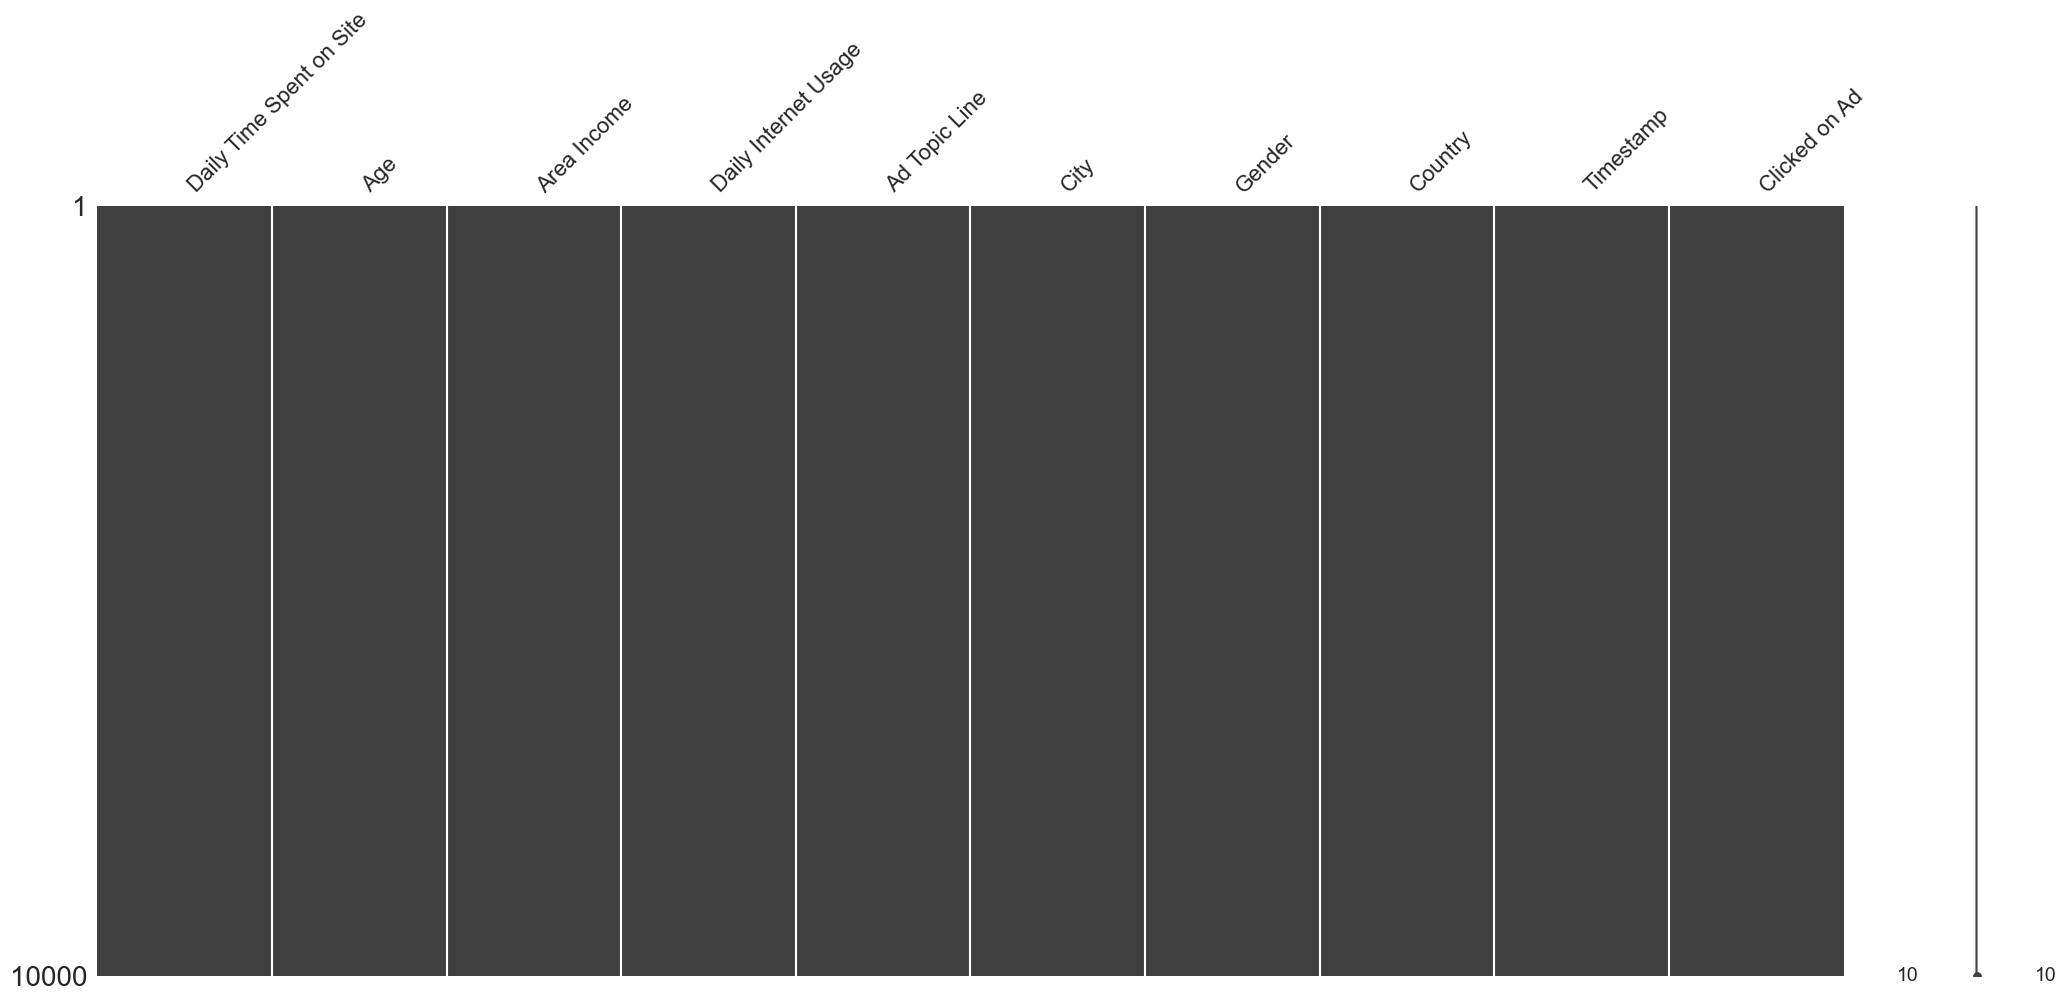

In [81]:
msgn.matrix(data)

## Data distribution

In [82]:
data.select_dtypes(np.number).columns[:-1]

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage'],
      dtype='object')

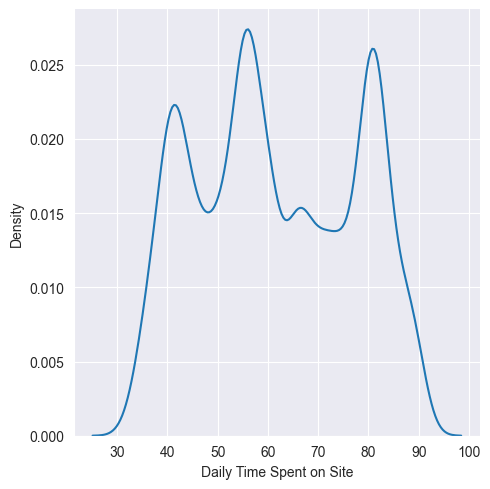

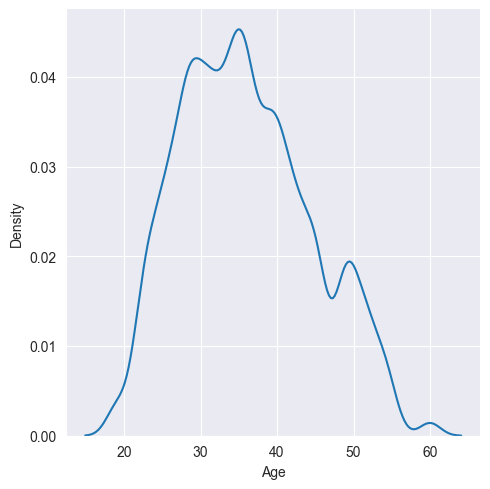

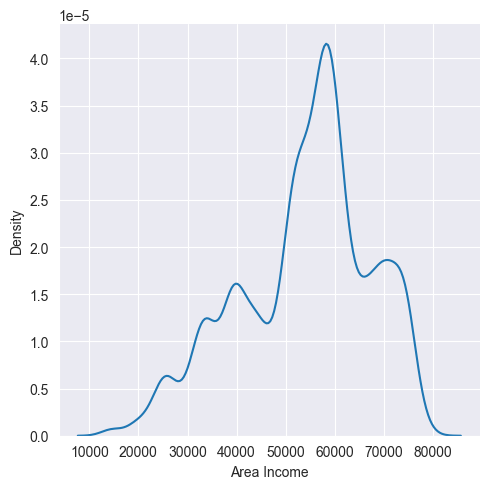

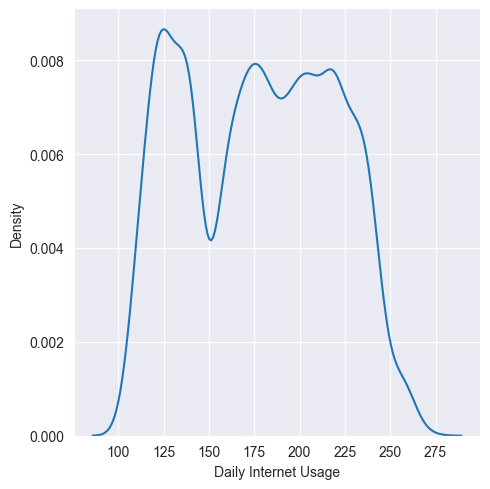

In [83]:
for i, column in enumerate(data.select_dtypes(np.number).columns[:-1]):
    sns.displot(data[column], kind='kde')

## Correlation 

In [84]:
num_data = data.select_dtypes(np.number)

<Axes: >

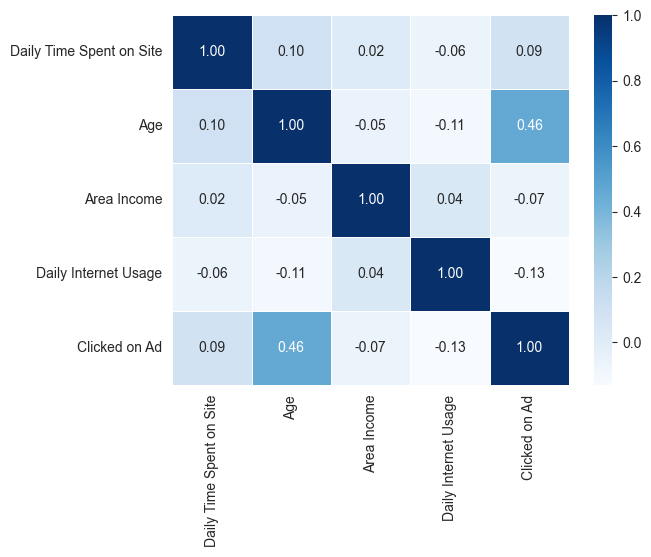

In [85]:
sns.heatmap(num_data.corr(), annot=True, fmt=".2f", linewidths=0.5,cmap='Blues')

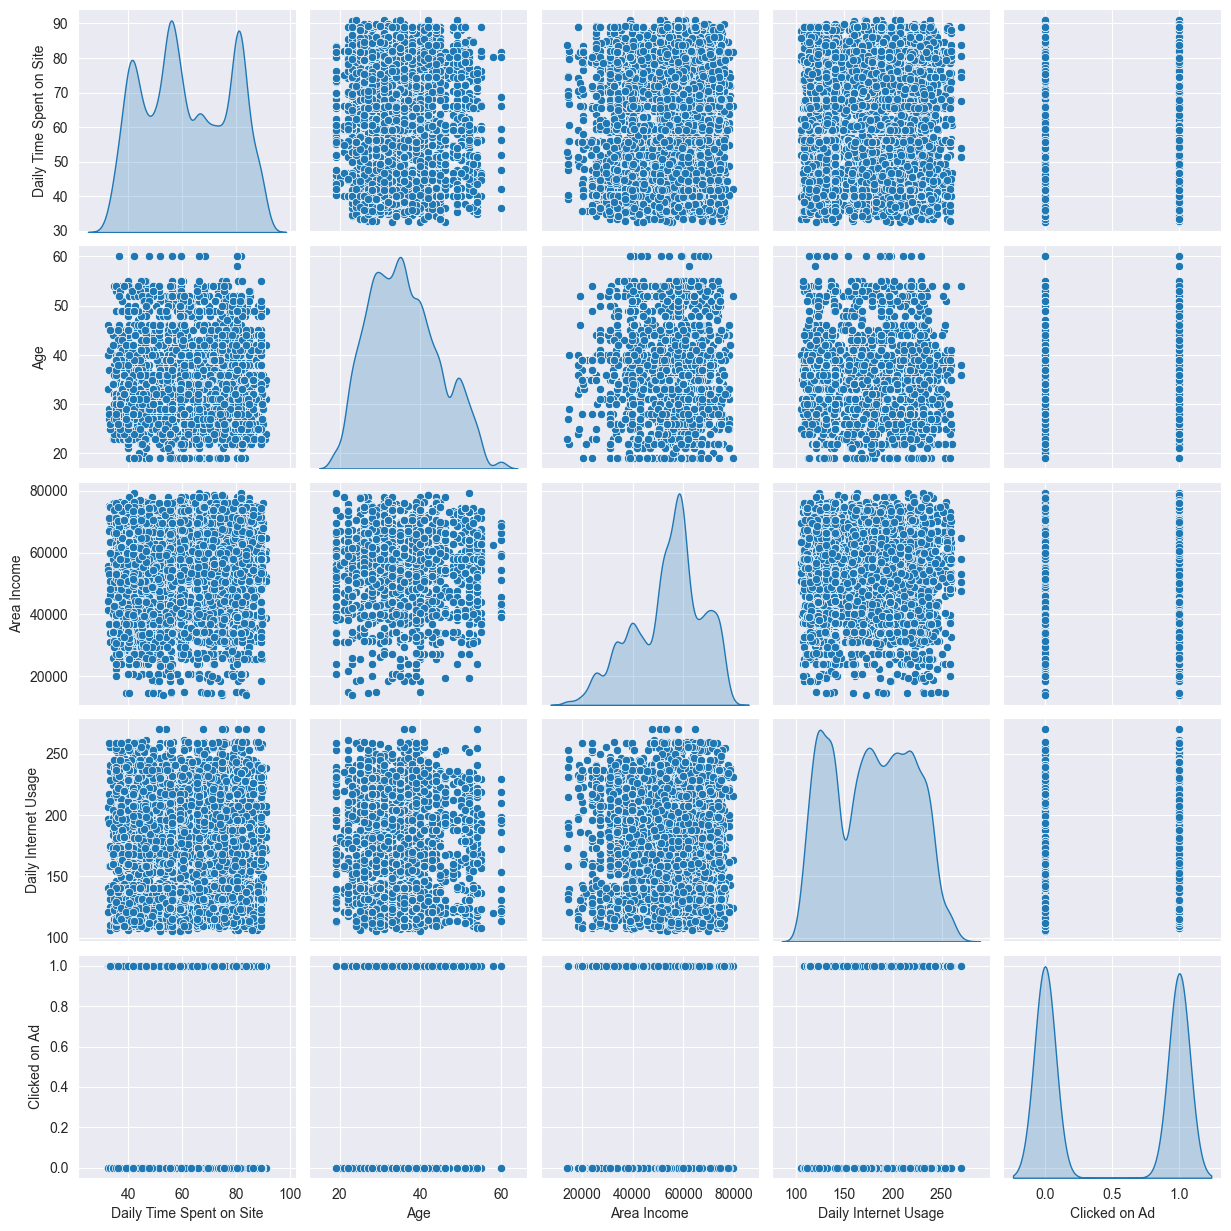

In [86]:
sns.pairplot(num_data, diag_kind = 'kde')

## Contonous variables on target

In [87]:
data.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Gender', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [88]:
def box_plot(x, y):

    plt.figure(figsize=(8, 6))
    sns.boxplot(x=x, y=y, data=data)
    plt.title(f'{x} vs {y}')
    plt.show()

def violin_plot(x, y):
    plt.figure(figsize=(8, 6))
    sns.violinplot(x=x, y=y, data=data)
    plt.title(f'{x} vs {y}')
    plt.show()

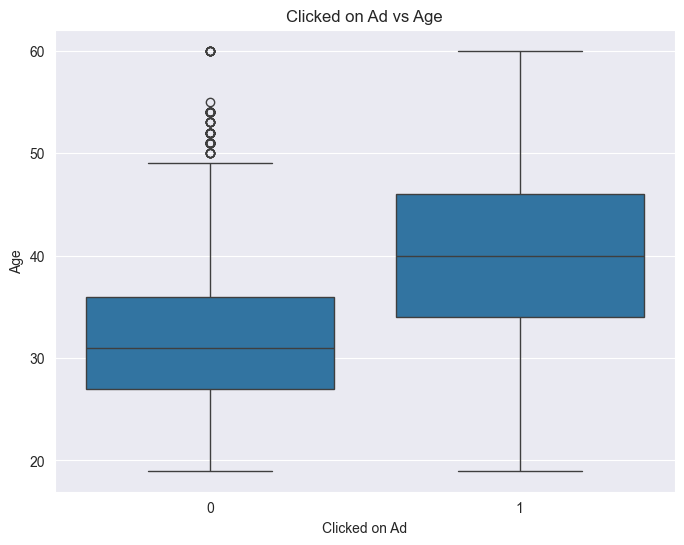

In [89]:
box_plot('Clicked on Ad', 'Age')

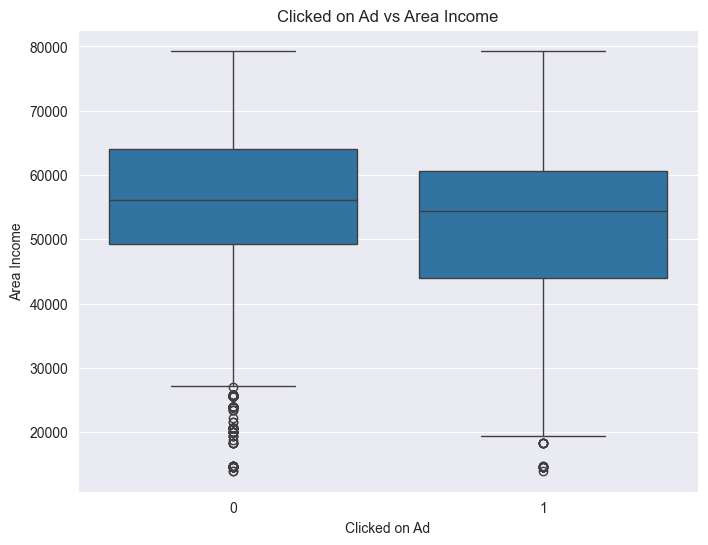

In [90]:
box_plot('Clicked on Ad', 'Area Income')

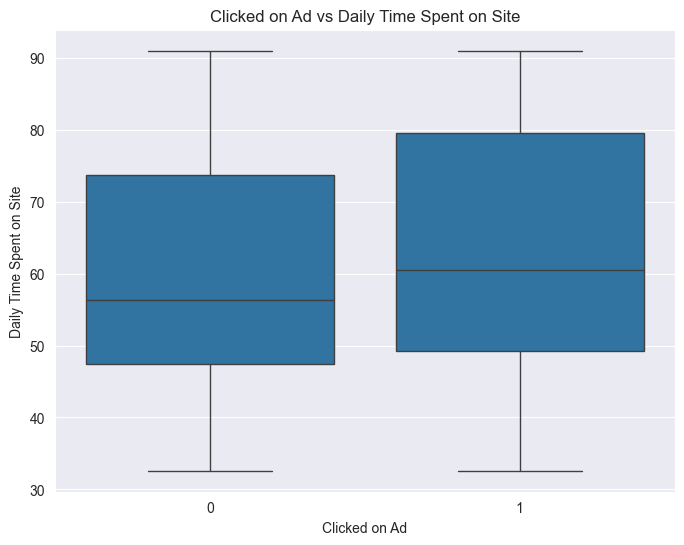

In [91]:
box_plot('Clicked on Ad', 'Daily Time Spent on Site')

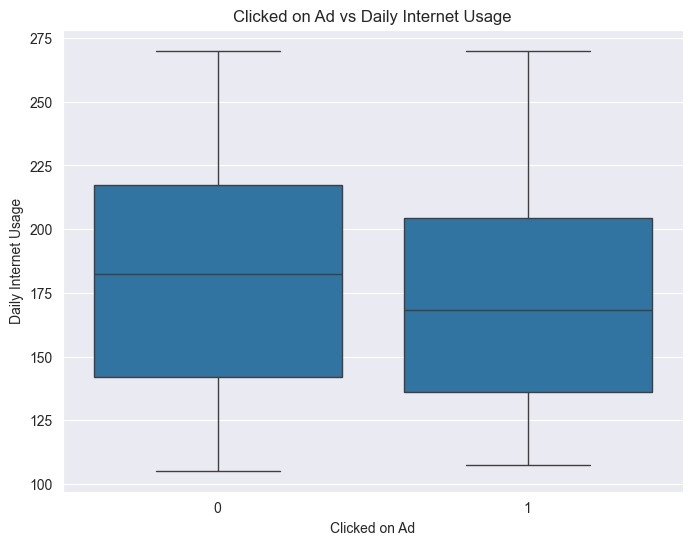

In [92]:
box_plot('Clicked on Ad', 'Daily Internet Usage')

# Outliers 

In [93]:
# checking boxplots
def boxplots_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(8,10))
    fig.suptitle(suptitle,y=1, size=25)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.boxplot(data=dataset[data], orient='h', ax=axs[i])
        axs[i].set_title(data + ', skewness is: '+str(round(dataset[data].skew(axis = 0, skipna = True),2)))

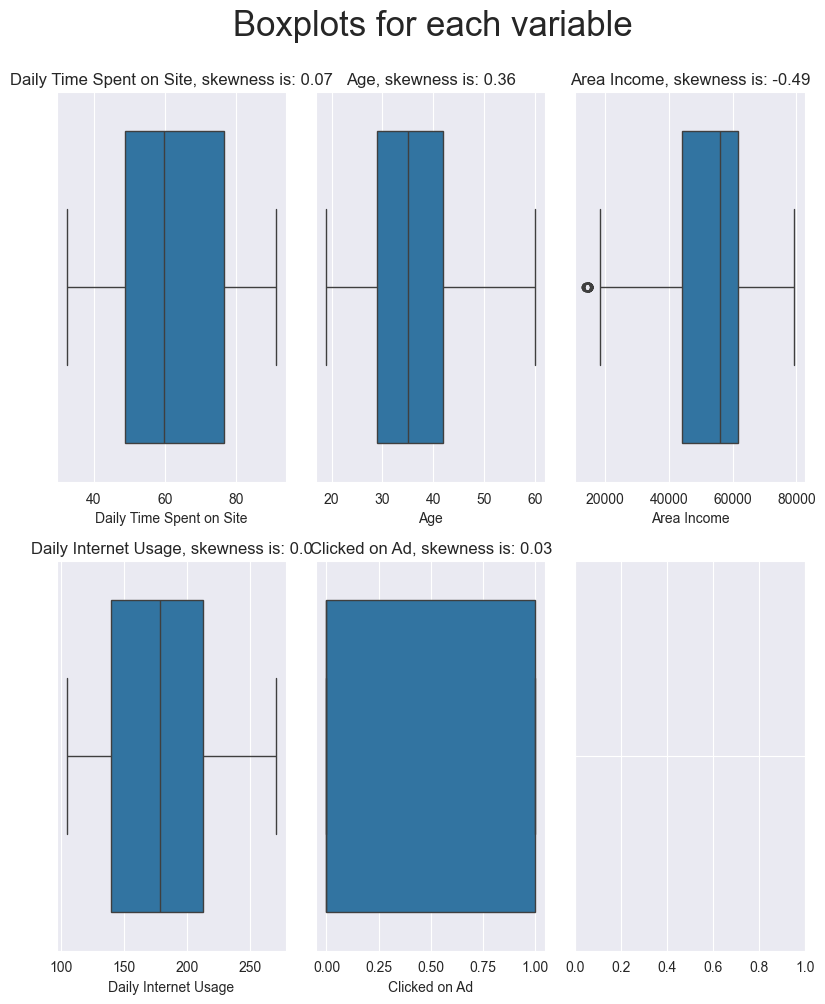

In [94]:
        
boxplots_custom(dataset=data, columns_list=data.select_dtypes(np.number), rows=2, cols=3, suptitle='Boxplots for each variable')
plt.tight_layout()

# Taeget feature

In [95]:
data['Clicked on Ad'].value_counts()

Clicked on Ad
0    5083
1    4917
Name: count, dtype: int64

<BarContainer object of 2 artists>

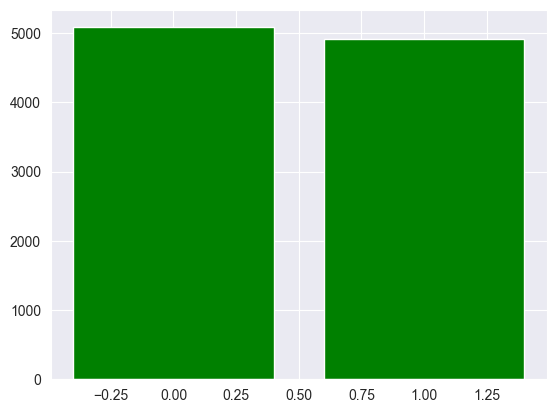

In [96]:
plt.bar(x=data['Clicked on Ad'].unique(), height=data['Clicked on Ad'].value_counts(), color = 'g')

## Investigating other features 

In [97]:
def visualise_features(data):
    cols = list(data.columns)
    for col in cols:
        print(f"col name: {col}\nuniques: {data[col].loc[-100:].unique()}\nnumber  of uniques{data[col].loc[-100:].nunique()}\ntype: {type(data[col][0])}")
        print(150 * '-')

In [98]:
visualise_features(data)

col name: Daily Time Spent on Site
uniques: [62.26 41.73 44.4  59.88 49.21 51.3  66.08 36.08 46.14 51.65 47.64 65.07
 55.6  78.84 56.39 54.43 60.23 89.05 39.96 59.22 47.74 86.06 61.22 60.53
 90.97 74.59 47.48 40.47 54.88 82.07 57.24 44.33 71.03 42.04 43.49 51.24
 68.01 46.61 63.45 36.56 51.56 52.84 65.77 76.64 57.99 55.92 70.09 72.23
 59.05 55.79 59.51 81.32 72.19 53.68 48.03 49.42 53.92 73.1  54.08 34.3
 54.97 75.55 44.78 73.19 50.08 50.19 73.93 39.3  74.63 83.97 80.3  88.04
 59.59 40.04 33.33 84.   52.68 75.84 81.59 61.84 79.91 79.6  37.   64.75
 70.58 81.22 79.54 65.59 70.44 70.39 79.52 78.7  67.56 83.71 76.77 78.36
 59.36 66.12 84.73 43.6  71.84 70.92 69.77 80.47 72.55 51.87 81.98 40.17
 65.65 56.16 78.79 75.15 82.79 75.71 68.88 84.98 85.84 50.63 75.42 76.58
 76.81 73.72 80.99 35.61 81.58 78.64 71.28 62.42 76.87 76.06 56.3  79.81
 56.34 34.78 73.49 55.55 85.62 39.36 81.1  72.97 80.51 76.2  36.73 48.46
 89.   71.14 43.67 80.31 45.99 40.01 70.29 88.12 69.62 41.49 73.89 51.38
 43.84 5

-   `Ad topic line` has 559 unique values which are textual data containing the topic of each ad. NLP techniques needed to extract features from it.
-   `Gender` there are only two unique values in this column.
-   `Country` it contains 207 unique country names, which we can encode it using target-encoding or one-hot encoding and etc. we will find a way! 
-   `City` contains 521 uinque values which are same as countries(encoding techniques), we can mabey make a mixed feature based on country and city.

for the rest numeric features, as we saw them before, we need to `Scale` them using techniques like `Standardization` or `Min-Max scaler`.

## Textual features 

In [99]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS

In [100]:
data['Ad Topic Line'].values

array(['Decentralized real-time circuit',
       'Optional full-range projection',
       'Total 5thgeneration standardization', ...,
       'Intuitive exuding service-desk',
       'Realigned content-based leverage',
       'Optimized upward-trending productivity'], dtype=object)

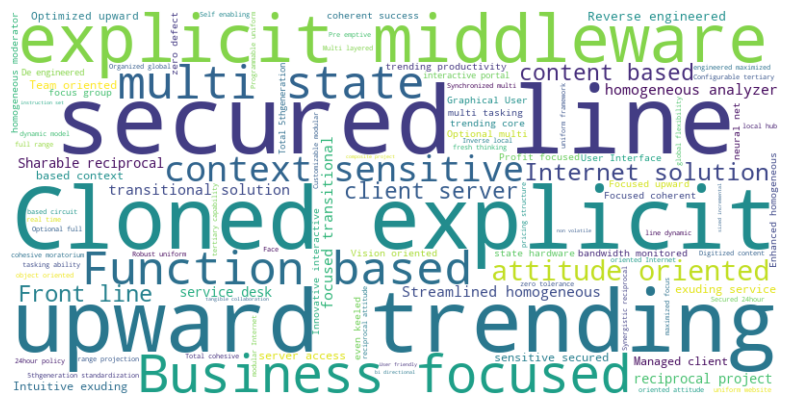

In [101]:
stopwords = set(STOPWORDS)
stopwords.update(['is', 'for'])

wordcloud = WordCloud(
    width=800, 
    height=400, 
    background_color='white', 
    stopwords=stopwords, 
    max_words=100, 
    colormap='viridis', 
    contour_width=1, 
    contour_color='steelblue'
).generate(' '.join(data['Ad Topic Line'].values))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  
plt.show()


## Training arbitary model

In [102]:
from sklearn.metrics import classification_report


def classification_results(y_pred, y_true, phase, method = ''):
    print(f"{method} Classification Report {phase}:")
    print(classification_report(y_true, y_pred))

def plot_classification_report(y_true, y_pred, title = ''):
    report = classification_report(y_true, y_pred, output_dict=True)
    df = pd.DataFrame(report).transpose()
    sns.heatmap(df.iloc[:-1, :-1], annot=True, cmap="YlGnBu")
    plt.title(title)
    plt.show()

In [103]:
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(y_true, y_pred_proba):
    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

In [104]:
from sklearn.model_selection import train_test_split

X = num_data.drop(['Clicked on Ad'], axis = 1)
y = num_data['Clicked on Ad']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [105]:
from sklearn.svm import SVC

svc = SVC(random_state=42, kernel='rbf', probability=True)
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)

In [106]:
classification_results(y_pred=y_pred, y_true=y_test, phase='Test', method='SVC')

SVC Classification Report Test:
              precision    recall  f1-score   support

           0       0.55      0.62      0.58      1014
           1       0.55      0.48      0.51       986

    accuracy                           0.55      2000
   macro avg       0.55      0.55      0.55      2000
weighted avg       0.55      0.55      0.55      2000



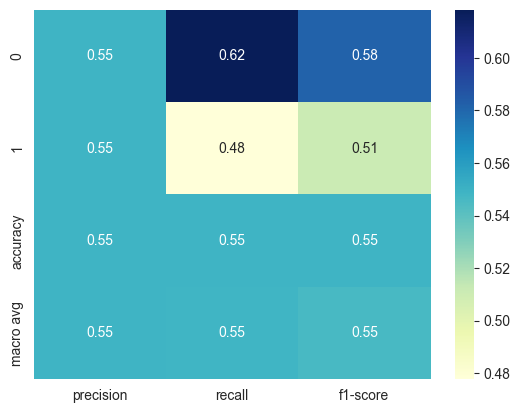

In [107]:
plot_classification_report(y_pred=y_pred, y_true=y_test, title='')

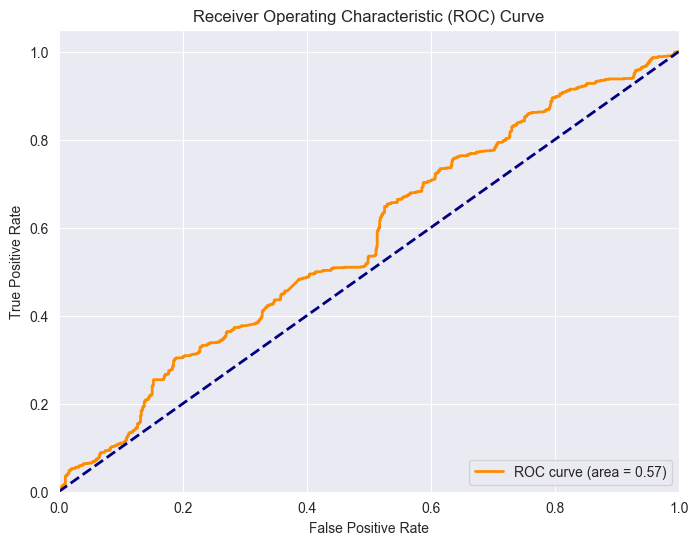

In [108]:
plot_roc_curve(y_test, svc.predict_proba(x_test)[:, 1])

The model performance is almost random(50%accuracy). lets try to improve the result by applying some feature engineering and transfotmation steps. 

## Timestamp

In [109]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

data['month'] = data['Timestamp'].dt.month

data['weekday'] = data['Timestamp'].dt.day_name()

def categorize_time_of_day(hour):
    if 5 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 14:
        return 'noon'
    elif 14 <= hour < 18:
        return 'afternoon'
    elif 18 <= hour < 21:
        return 'evening'
    else:
        return 'night'

data['time_of_day'] = data['Timestamp'].dt.hour.apply(categorize_time_of_day)

data = data.drop(columns=['Timestamp'])

to deal with the timestamp feature, which was in the format of `2016-01-03 03:22:15`, i extract year, month, weekday, and time of the day. which may have significant impact on the clicking on the ads.

<BarContainer object of 5 artists>

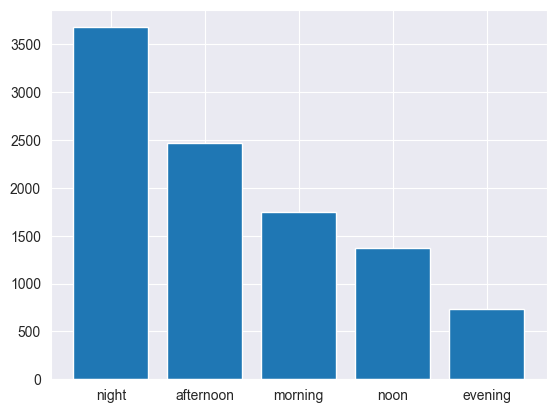

In [110]:
plt.bar(x= data['time_of_day'].unique(), height=data['time_of_day'].value_counts())

<BarContainer object of 7 artists>

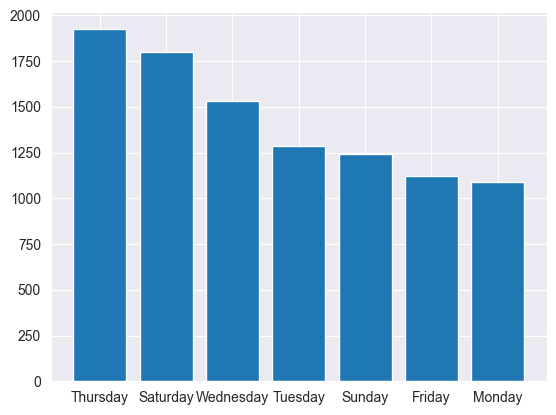

In [111]:
plt.bar(x= data['weekday'].unique(), height=data['weekday'].value_counts())

In [112]:
data.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Gender', 'Country',
       'Clicked on Ad', 'month', 'weekday', 'time_of_day'],
      dtype='object')

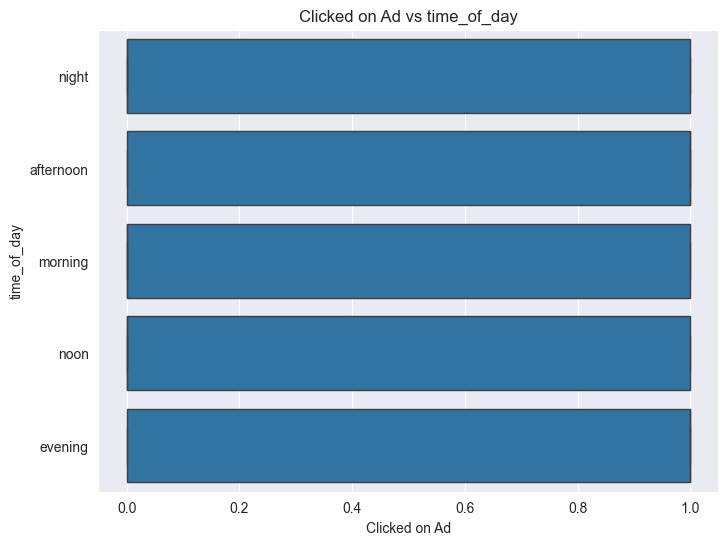

In [113]:
box_plot('Clicked on Ad', 'time_of_day')

# encoding for country and city

In [114]:
data.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Gender', 'Country',
       'Clicked on Ad', 'month', 'weekday', 'time_of_day'],
      dtype='object')

In [115]:
# train-test split 
from sklearn.model_selection import train_test_split
X = data.drop(['Clicked on Ad'], axis = 1)
y = data['Clicked on Ad']

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

## TF-IDF from text feature

In [116]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kara\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kara\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [117]:
class TextPreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.stopwords = set(stopwords.words('english'))

    def preprocess(self, text):

        text = re.sub(r'[^\w\s]', '', text)
        text = text.lower()
        words = [word for word in text.split() if word not in self.stopwords]
        return ' '.join(words)

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return X.apply(self.preprocess)

pipeline = Pipeline([
    ('preprocessor', TextPreprocessor()),
    ('tfidf', TfidfVectorizer(max_features=300, ngram_range=(1, 2)))
])

tfidf_matrix = pipeline.fit_transform(x_train['Ad Topic Line'])
tfidf_matrix_test = pipeline.transform(x_test['Ad Topic Line'])

tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=pipeline.named_steps['tfidf'].get_feature_names_out(), index=x_train.index)
tfidf_df_test = pd.DataFrame(tfidf_matrix_test.toarray(), columns=pipeline.named_steps['tfidf'].get_feature_names_out(), index=x_test.index)

In [118]:
x_train = pd.concat([x_train, tfidf_df], axis = 1)
x_test = pd.concat([x_test, tfidf_df_test], axis = 1)

# Frequency encoding

I applied frequency encoding for features like country and city, to enforce model to learn which country and city is more often to click on ads(ofxors the people of the country/city), which is may related to cultural, and strongness of the advetisement companies on that place.

In [119]:
country_freq = x_train['Country'].value_counts() / len(x_train)
country_freq_test = x_test['Country'].value_counts() / len(x_test)

city_freq = x_train['City'].value_counts() / len(x_train)
city_freq_test = x_test['City'].value_counts() / len(x_test)

x_train['Country'] = x_train['Country'].map(country_freq)
x_test['Country'] = x_test['Country'].map(country_freq_test)

x_train['City'] = x_train['City'].map(city_freq)
x_test['City'] = x_test['City'].map(city_freq_test)

## label encode Gender

to encode Gender, the best choise is label encoding, its simple and handy!

In [120]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
x_train['Gender'] = label_encoder.fit_transform(x_train['Gender'])
x_test['Gender'] = label_encoder.transform(x_test['Gender'])

In [121]:
x_train.shape

(8000, 311)

## Frequency encoder for ad topics

along with the ad topics, the thing which is may matter on this feature, is how much this topic is trend on that time! so the frequency of the topics is improtant for model to figure out the trends and most common topics which people often click on! 

In [122]:
country_freq = x_train['Ad Topic Line'].value_counts() / len(x_train)
country_freq_test = x_test['Ad Topic Line'].value_counts() / len(x_test)

x_train['Ad Topic Line'] = x_train['Ad Topic Line'].map(country_freq)
x_test['Ad Topic Line'] = x_test['Ad Topic Line'].map(country_freq_test)

## One-hot

to encode the weekday and time of day, i used one-hot encoding, since there is not a significant linear relationship between these features and the target, so may the label encoding and frequency encoding not a good option!

In [123]:
def oh_encode(col, x_train, x_test):
    train_one_hot = pd.get_dummies(x_train[col], prefix = col)

    test_one_hot = pd.get_dummies(x_test[col], prefix=col)

    test_one_hot = test_one_hot.reindex(columns=train_one_hot.columns, fill_value=0)

    x_train = x_train.drop(columns=[col])
    x_test = x_test.drop(columns=[col])

    x_train = pd.concat([x_train, train_one_hot], axis=1)
    x_test = pd.concat([x_test, test_one_hot], axis=1)
    return x_train, x_test

In [124]:
x_train, x_test = oh_encode('time_of_day', x_train=x_train, x_test=x_test)
x_train, x_test = oh_encode('weekday', x_train=x_train, x_test=x_test)

## Standardizationi 

i also preffer to scale the numerical features, due to some features has different scales and some models are sensitive to scale of the numbers! 

In [125]:
from sklearn.preprocessing import StandardScaler

In [126]:
scaler = StandardScaler()

columns_to_standardize = num_data.columns[:-1]

x_train[columns_to_standardize] = scaler.fit_transform(x_train[columns_to_standardize])
x_test[columns_to_standardize] = scaler.transform(x_test[columns_to_standardize])

# 2- Train model 

base model with basic features. 

## SVM classifier 

In [127]:
from sklearn import svm

In [128]:
svc = svm.SVC(kernel='rbf')

svc.fit(x_train, y_train)

SVC()

In [129]:
y_hat = svc.predict(x_test)

In [130]:
classification_results(y_train, svc.predict(x_train), phase='train')

 Classification Report train:
              precision    recall  f1-score   support

           0       0.85      0.81      0.83      4258
           1       0.80      0.84      0.82      3742

    accuracy                           0.83      8000
   macro avg       0.82      0.83      0.83      8000
weighted avg       0.83      0.83      0.83      8000



In [131]:
classification_results(y_hat, y_test, phase='test')

 Classification Report test:
              precision    recall  f1-score   support

           0       0.81      0.83      0.82      1014
           1       0.82      0.80      0.81       986

    accuracy                           0.81      2000
   macro avg       0.82      0.81      0.81      2000
weighted avg       0.82      0.81      0.81      2000



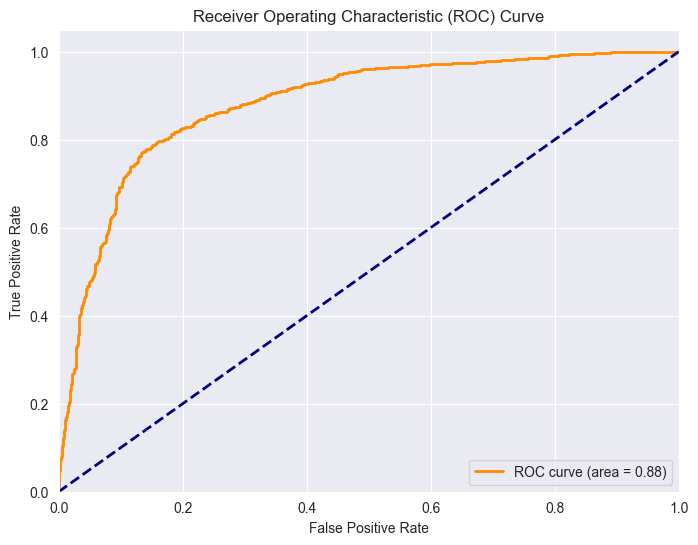

In [132]:
plot_roc_curve(y_test, svc.decision_function(x_test))

# RandomForest 

In [133]:
from sklearn.ensemble import RandomForestClassifier

In [134]:
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)
y_hat = rf.predict(x_test)

In [135]:
classification_results(y_train, rf.predict(x_train), phase='train')

 Classification Report train:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4069
           1       1.00      1.00      1.00      3931

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000



In [136]:
classification_results(y_test, y_hat, phase='test')

 Classification Report test:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1004
           1       0.85      0.84      0.85       996

    accuracy                           0.85      2000
   macro avg       0.85      0.85      0.85      2000
weighted avg       0.85      0.85      0.85      2000



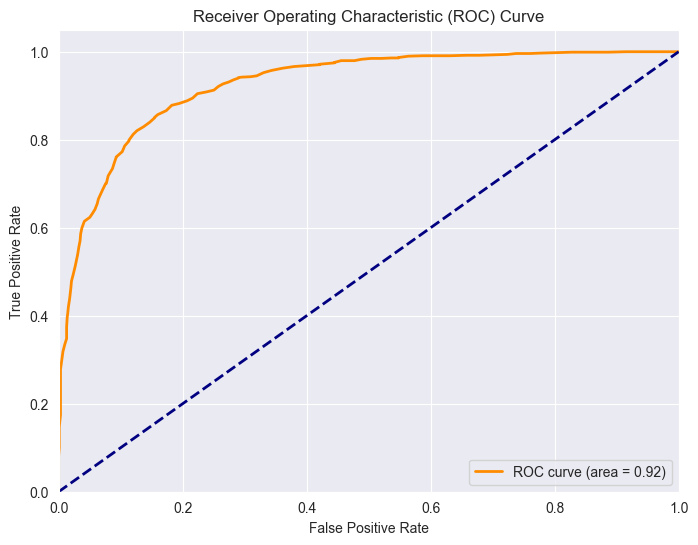

In [137]:
plot_roc_curve(y_test, rf.predict_proba(x_test)[:, 1])

# Logistic regression

In [138]:
from sklearn.linear_model import LogisticRegression

In [139]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_hat = lr.predict(x_test)

C:\Users\kara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [140]:
classification_results(y_train, lr.predict(x_train), phase='train')

 Classification Report train:
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      4161
           1       0.80      0.82      0.81      3839

    accuracy                           0.81      8000
   macro avg       0.81      0.81      0.81      8000
weighted avg       0.81      0.81      0.81      8000



In [141]:
classification_results(y_test, y_hat, phase='test')

 Classification Report test:
              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1011
           1       0.80      0.80      0.80       989

    accuracy                           0.81      2000
   macro avg       0.81      0.81      0.81      2000
weighted avg       0.81      0.81      0.81      2000



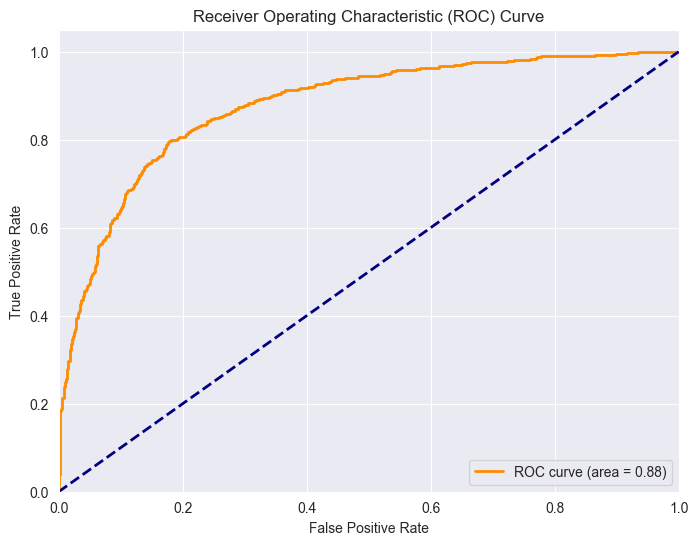

In [142]:
plot_roc_curve(y_test, lr.predict_proba(x_test)[:, 1])

# XGB

In [70]:
import xgboost as xgb

In [144]:
train_data = xgb.DMatrix(data=x_train, label=y_train)
test_data = xgb.DMatrix(data=x_test, label=y_test)

In [145]:
# Define parameters
params = {
    'objective': 'multi:softmax',  # Multi-class classification
    'num_class': 2,  # Number of classes in the dataset
    'learning_rate': 0.2,
}

# Train the model
model = xgb.train(params=params, dtrain=train_data, num_boost_round=200)

In [146]:
# Predict on test set
y_pred = model.predict(test_data)

In [147]:
classification_results(y_true=y_train, y_pred=model.predict(train_data), phase='Train')

 Classification Report Train:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      4069
           1       0.97      0.96      0.97      3931

    accuracy                           0.97      8000
   macro avg       0.97      0.97      0.97      8000
weighted avg       0.97      0.97      0.97      8000



In [148]:
classification_results(y_true=y_test, y_pred=y_pred, phase='Test')

 Classification Report Test:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1014
           1       0.84      0.83      0.84       986

    accuracy                           0.84      2000
   macro avg       0.84      0.84      0.84      2000
weighted avg       0.84      0.84      0.84      2000



# Cross-validation 

In [149]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

In [150]:
rf = RandomForestClassifier()

In [151]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(rf, x_train, y_train, cv=cv, scoring='accuracy')

print("Cross-Validation Scores: ", cv_scores)
print("Mean CV Accuracy: ", cv_scores.mean())
print("Standard Deviation of CV Accuracy: ", cv_scores.std())

Cross-Validation Scores:  [0.856875 0.851875 0.87625  0.85625  0.84375 ]
Mean CV Accuracy:  0.857
Standard Deviation of CV Accuracy:  0.010704847033003307


# Analyzing the results 
-   `SVM`: At first step, i trained a SVM with several polynomial degree to figure out the relationship among the features. the best result was for the polynomial degree 1, which means there is no polynomial relationship between features(above the degree 1), and then i tried `rbf` kernel instead, which leads to better results. it can shows that the data is quiete complex for linear models and we may need more complex models. the test accuracy on the SVM with rbf kernel was: `81%`.
-   `RandomForrest`: As its one of the benchmark models in the classic algorithms, i tried it to figure it the upper bound of the result on this data(i assumed the randomforrest is the best model). truely it was the best compared to other models.the result improved to : `85%` on the test data. it also had the best result on roc-auc score! which was `92%`.
-   `Logistic regression`: i also tried another classifier to ensure the complexity of the data, which the result was close to SVM model, which shows that the regular classifiers(non-ensembled and boosted) are not significant on this task.
-   `XGBoost`: another powerfull model which is based on boosting techniques, the result of close to randomforrest model and.

# Results 
| SVM | LR  |  RF | XGB |
|-----|-----|-----|-----|
| 81% | 81% | 85% | 84% |


cross-validation result for RandomForrest(best model):
-   Cross-Validation Scores:  [0.86125  0.845625 0.86875  0.8625   0.840625]
-   Mean CV Accuracy:  0.8557500000000001
-   Standard Deviation of CV Accuracy:  0.010733999720514278